In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

目标函数 $y=2x$

In [2]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = torch.tensor([1.0])
w.requires_grad = True

w 是 Tensor(张量类型)，Tensor 中包含 data 和 grad（可以类比一个链表节点包含节点值和next指针），data 和 grad 也是 Tensor。grad 初始为 None，如果需要求梯度需要显示说明。

In [3]:
def forward(x):
  return w * x

def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) ** 2

epoch_list = []
loss_list = []

`.backward()` 会求出所有需要求梯度的参数的梯度，把梯度都存在对应的待求的参数中，最终计算图被释放

w 是一个 tensor 张量，取出数值需要用 w.data 取出， w.grad.data 表示 w 的梯度值用于 w.data 的更新

每一个迭代的梯度不会自动消失，需要手动清除梯度，否则 n 次迭代的梯度会叠加

In [4]:
print('Predict (before training)', 4, forward(4))
for epoch in range(100):
  for x, y in zip(x_data, y_data):
    loss_val = loss(x, y)
    loss_val.backward()
    w.data -= 0.01 * w.grad.data

    w.grad.data.zero_()

  epoch_list.append(epoch)
  loss_list.append(loss_val.item())
  if epoch % 10 == 0:
    print('epoch:', epoch, 'loss=', loss_val.item())

print('Predict (after training)', 4, forward(4).item())

Predict (before training) 4 tensor([4.], grad_fn=<MulBackward0>)
epoch: 0 loss= 7.315943717956543
epoch: 10 loss= 0.017410902306437492
epoch: 20 loss= 4.143271507928148e-05
epoch: 30 loss= 9.874406714516226e-08
epoch: 40 loss= 2.3283064365386963e-10
epoch: 50 loss= 9.094947017729282e-13
epoch: 60 loss= 9.094947017729282e-13
epoch: 70 loss= 9.094947017729282e-13
epoch: 80 loss= 9.094947017729282e-13
epoch: 90 loss= 9.094947017729282e-13
Predict (after training) 4 7.999998569488525


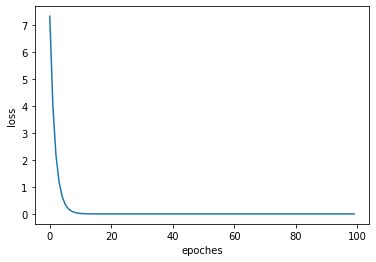

In [5]:
plt.plot(epoch_list, loss_list)
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()